In [1]:
import numpy as np 
import pandas as pd  
import cv2
import matplotlib.pyplot as plt 
import os
print(os.listdir("../Image Classification with CNN for Malaria Data/cell_images"))
from matplotlib.image import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

['Parasitized', 'Uninfected']


In [5]:
train_data=os.listdir("../Image Classification with CNN for Malaria Data/cell_images/") 


parasitized_data = os.listdir("../Image Classification with CNN for Malaria Data/cell_images/Parasitized/") #Parazitli örnek
print(parasitized_data[:5]) 

uninfected_data = os.listdir("../Image Classification with CNN for Malaria Data/cell_images/Uninfected/")#Parazitsiz temiz örnek

print(uninfected_data[:5])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png']
['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png']


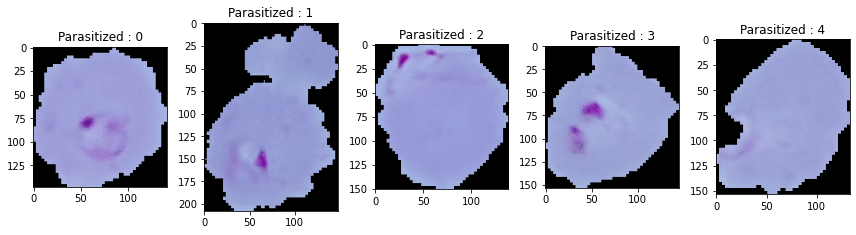

In [8]:
# Parasitized Datas

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread("../Image Classification with CNN for Malaria Data/cell_images/Parasitized" + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('Parasitized : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

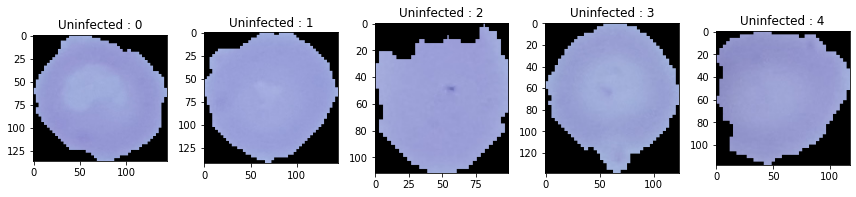

In [9]:
# Uninfected clean datas

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread("../Image Classification with CNN for Malaria Data/cell_images/Uninfected" + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('Uninfected : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

In [10]:
import pathlib
import tensorflow as tf
from tensorflow.keras import layers

In [11]:
data_dir = pathlib.Path("../Image Classification with CNN for Malaria Data/cell_images/")

In [13]:
batch_size = 128
img_height = 150
img_width = 150

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.


In [15]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [16]:
groupy = train_ds.class_names
print(groupy)

['Parasitized', 'Uninfected']


In [17]:
#Yüksek veri seti ile çalışırken cache te tutulan bilgilerin sürekli tekrar edilmemesi ve eğitim sırasında model ile çakışmaması için aşağıdaki AUTOTUNE fonksiyonunu kullanıyoruz.

In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE) 

In [19]:
num_classes = len(groupy)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 37, 37, 32)        0

In [21]:
tf.keras.backend.clear_session()  #cache te tutulan bilgileri temizliyoruz

In [22]:
epochs = 10
history = model.fit(train_ds, validation_data=val_ds,epochs=epochs, verbose=1)

Epoch 1/10
 21/173 [==>...........................] - ETA: 6:20 - loss: 0.9094 - accuracy: 0.4913

KeyboardInterrupt: 

In [23]:
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="Val_Accuracy")
plt.legend();


NameError: name 'history' is not defined

In [24]:
plt.plot(history.history["loss"],label="Loss")
plt.plot(history.history["val_loss"],label="Val_Loss")
plt.legend();


NameError: name 'history' is not defined